In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
from collections import Counter

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from collections import Counter

In [ ]:
url = "https://learningenglish.voanews.com/apiXXXXXXXXXXXXXXXXx"
html = urlopen(url)

In [ ]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

In [ ]:
title = soup.title
print(title)

In [ ]:
text = soup.get_text()
print(text)

# Finding Title, Text, Category, Date

In [8]:
import re

In [9]:
item1 = soup.find_all("item")
stritem= str(item1)

In [10]:
title = soup.find_all("item")
strtitle= str(title)

In [11]:
categoty = soup.find_all("item")
strcategory= str(categoty)

In [12]:
description = soup.find_all("item")
strdescription = str(description)

In [13]:
pubdate = soup.find_all("pubdate")
strpubdate = str(pubdate)

In [14]:
list_title = []
for row in item1 :
    cells = row.find_all('title')
    stritem = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', stritem))
    list_title.append(clean2)
print(clean2)
type(clean2)

[California Hmong in Mourning After Deadly Attack]


str

In [15]:
list_category = []
for row in item1 :
    cell1 = row.find_all('category')
    strcategory = str(cell1)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', strcategory))
    list_category.append(clean2)
print(clean2)
type(clean2)

[As It Is, Read, Listen &amp; Learn, As It Is]


str

In [16]:
list_description = []
for row in item1 :
    cell1 = row.find_all('description')
    strdescription = str(cell1)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', strdescription))
    list_description.append(clean2)
print(clean2)
type(clean2)

[

 


Members of the ethnic Hmong community in Fresno, California are in mourning after gunmen shot 10 men killing four over the weekend.


Police said at least two men armed with semi-automatic handguns entered the backyard of a house and started shooting into a crowd. About 16 men had gathered there to watch a football game on television. The gunmen did not speak, and no one had a good look at them. Police said witnesses only saw flashes of gunfire in the dark.


Sunday evening’s attack killed Xy Lee, a popular Hmong singer and musician. His YouTube videos have been viewed millions of times. Also killed were Phia Vang, Kou Xiong, and Kalaxang Thao. Officials said six were wounded including three in serious condition. Women and children inside the house were not hit.


Pao Yang is head of the Fresno Center, a Hmong community group. He said, “Our community is in mourning, and we still don’t know what’s going on, or who are the suspects.”


On Xy Lee’s YouTube channel, one fan wrote, “

str

In [17]:
list_pubdate = []
for row in item1 :
    cell1 = row.find_all('pubdate')
    strpubdate = str(cell1)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', strpubdate))
    list_pubdate.append(clean2)
print(clean2)
type(clean2)

[Tue, 19 Nov 2019 22:57:31 +0000]


str

In [18]:
wayone = pd.DataFrame(list_title)

In [19]:
wayone['category'] = list_category

In [20]:
wayone['text'] = list_description

In [21]:
wayone['pubDate'] = list_pubdate

# Cleaning Our Article and Find Word Freqency

In [22]:
wayone['text'].head(1)

0    [\r\n\r\n\r\n\r\n\r\n\r\nThis week we answer a...
Name: text, dtype: object

In [23]:
wayone['cleantext'] = wayone['text'].map(lambda x: x.lower())

In [24]:
wayone['cleantext']= wayone['cleantext'].str.replace('[^\w\s]', ' ')

In [25]:
def remove(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list

In [26]:
wayone['cleantext'] = remove(wayone['cleantext'])

In [27]:
from nltk.corpus import stopwords

In [28]:
stpwords =  stopwords.words("english")

In [29]:
wayone['cleantext'] = wayone['cleantext'].apply(lambda x: " ".join(word for word in x.split() if word not in stpwords))

In [30]:
stpwords2 = ['n','adj','adv','v','u']
len(stpwords2)

5

In [31]:
wayone['cleantext'] = wayone['cleantext'].apply(lambda x: " ".join(word for word in x.split() if word not in stpwords2))

In [32]:
wayone.head()

,0,category,text,pubDate,cleantext
0,[Trust or Believe?],"[Ask a Teacher, Read, Listen &amp; Learn, Ask ...",[\r\n\r\n\r\n\r\n\r\n\r\nThis week we answer a...,"[Fri, 22 Nov 2019 23:02:06 +0000]",week answer question reza bangladesh reza writ...
1,"['Two Thanksgiving Day Gentlemen,' by O. Henry]","[American Stories, Read, Listen &amp; Learn, A...","[\r\n\r\nWe present the short story ""Two Thank...","[Fri, 22 Nov 2019 23:00:16 +0000]",present short story two thanksgiving day gentl...
2,[Balloon Festivals Celebrate First Method of H...,"[Arts &amp; Culture, Read, Listen &amp; Learn,...",[\r\n\r\n \r\n\r\n\r\nThe path of human aviati...,"[Fri, 22 Nov 2019 22:58:09 +0000]",path human aviation uneven dangerous ancient s...
3,[South Koreans Take Part in ‘Living Funerals’ ...,"[As It Is, Read, Listen &amp; Learn, As It Is]",[\r\n\r\n \r\n\r\n\r\nThousands of South Korea...,"[Fri, 22 Nov 2019 22:57:50 +0000]",thousands south koreans taken part living fune...
4,[Usain Bolt Brings His E-Scooters to Japan],"[As It Is, Read, Listen &amp; Learn, As It Is]",[\r\n\r\n\r\n\r\nOlympic gold medalist Usain B...,"[Fri, 22 Nov 2019 22:56:57 +0000]",olympic gold medalist usain bolt co founded co...


In [35]:
pd.options.display.max_colwidth=100

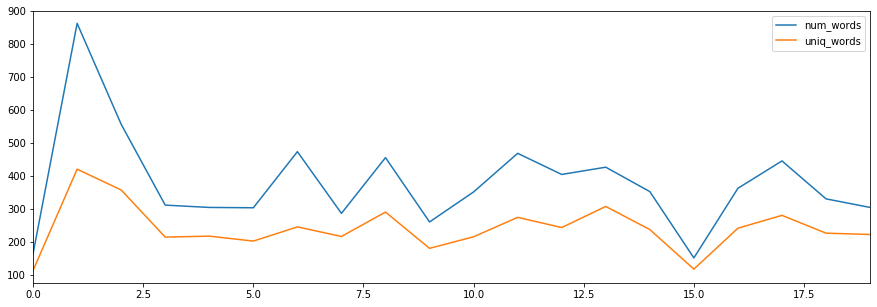

In [50]:
wayone.plot(figsize=(15,5))

In [38]:
wayone['num_words'] = wayone['cleantext'].apply(lambda x: len(x.split()))

Text(0, 0.5, 'Repetation')

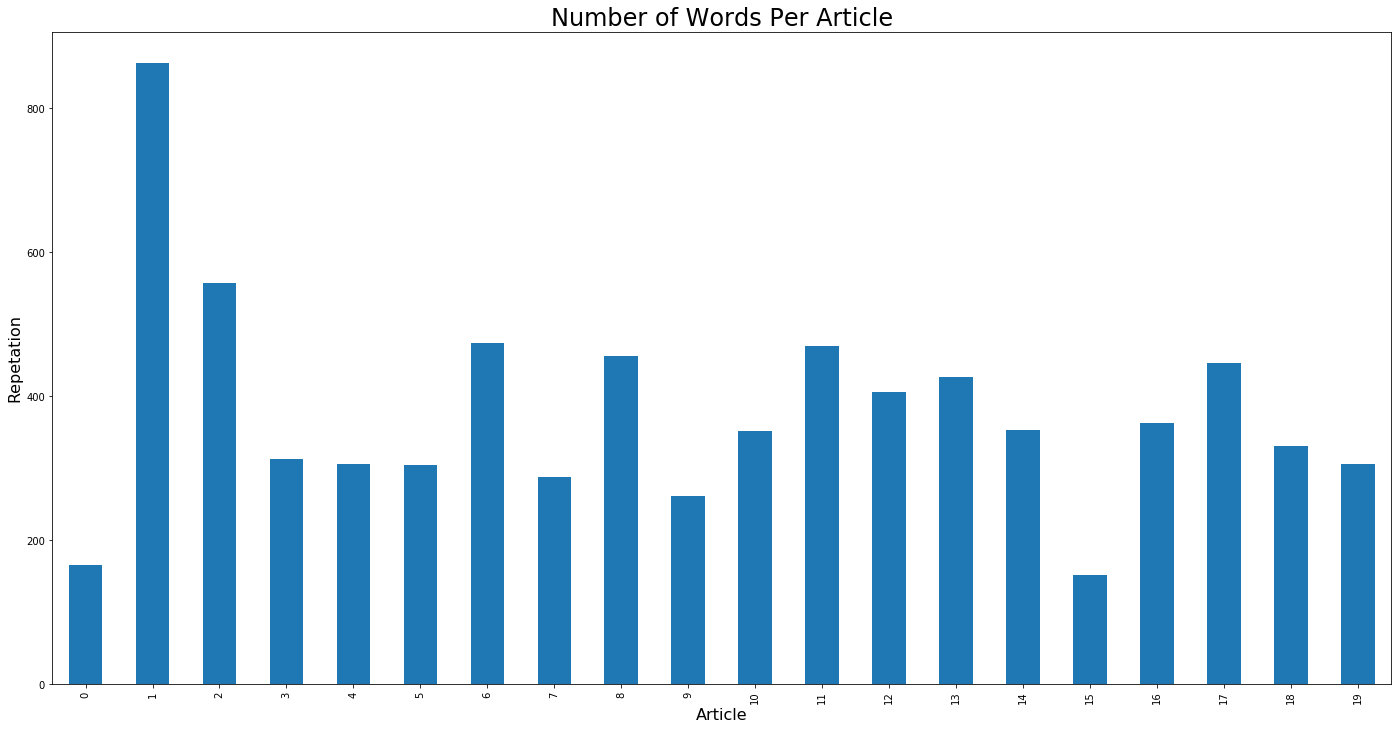

In [39]:
ax = wayone['num_words'].plot(kind='bar', figsize=(24,12))
ax.set_title('Number of Words Per Article', fontsize=24)
ax.set_xlabel('Article', fontsize=16)
ax.set_ylabel('Repetation', fontsize=16)

In [40]:
wayone['uniq_words'] = wayone['cleantext'].str.split().apply(lambda x: len(set(x)))

Text(0, 0.5, 'Word Count')

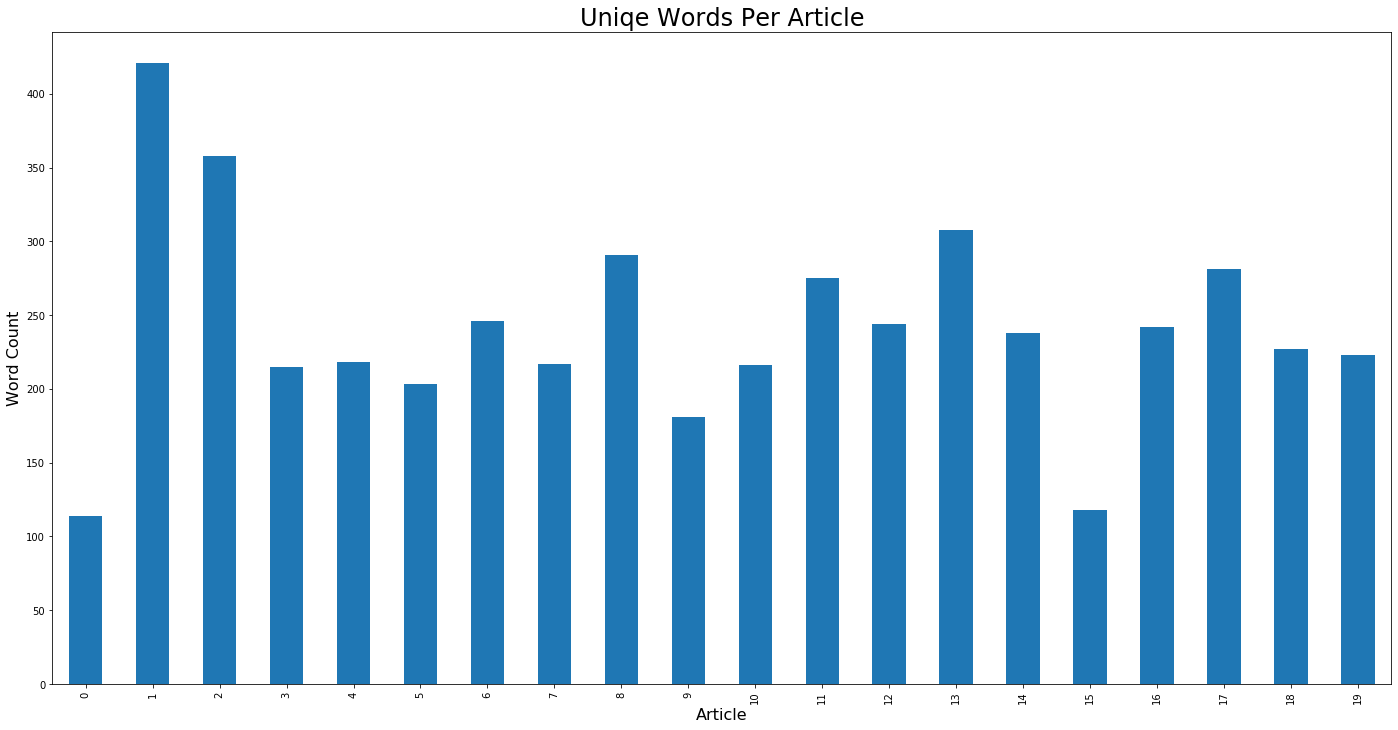

In [41]:
ax = wayone['uniq_words'].plot(kind='bar', figsize=(24,12))
ax.set_title('Uniqe Words Per Article', fontsize=24)
ax.set_xlabel('Article', fontsize=16)
ax.set_ylabel('Word Count', fontsize=16)

In [42]:
from collections import Counter

In [43]:
wordCount = Counter()
for i, row in wayone.iterrows():
    wordCount.update(row['cleantext'].split())

In [44]:
wordCount.most_common(20)

[('said', 90),
 ('story', 49),
 ('people', 44),
 ('old', 42),
 ('year', 39),
 ('also', 34),
 ('something', 33),
 ('one', 31),
 ('years', 31),
 ('words', 30),
 ('two', 26),
 ('lol', 26),
 ('know', 25),
 ('day', 25),
 ('stuffy', 25),
 ('gentleman', 25),
 ('students', 25),
 ('english', 24),
 ('e', 24),
 ('new', 23)]

In [45]:
top_words=wordCount.most_common(25)

In [46]:
top_words = dict(top_words)
names = list(top_words.keys())
values = list(top_words.values())

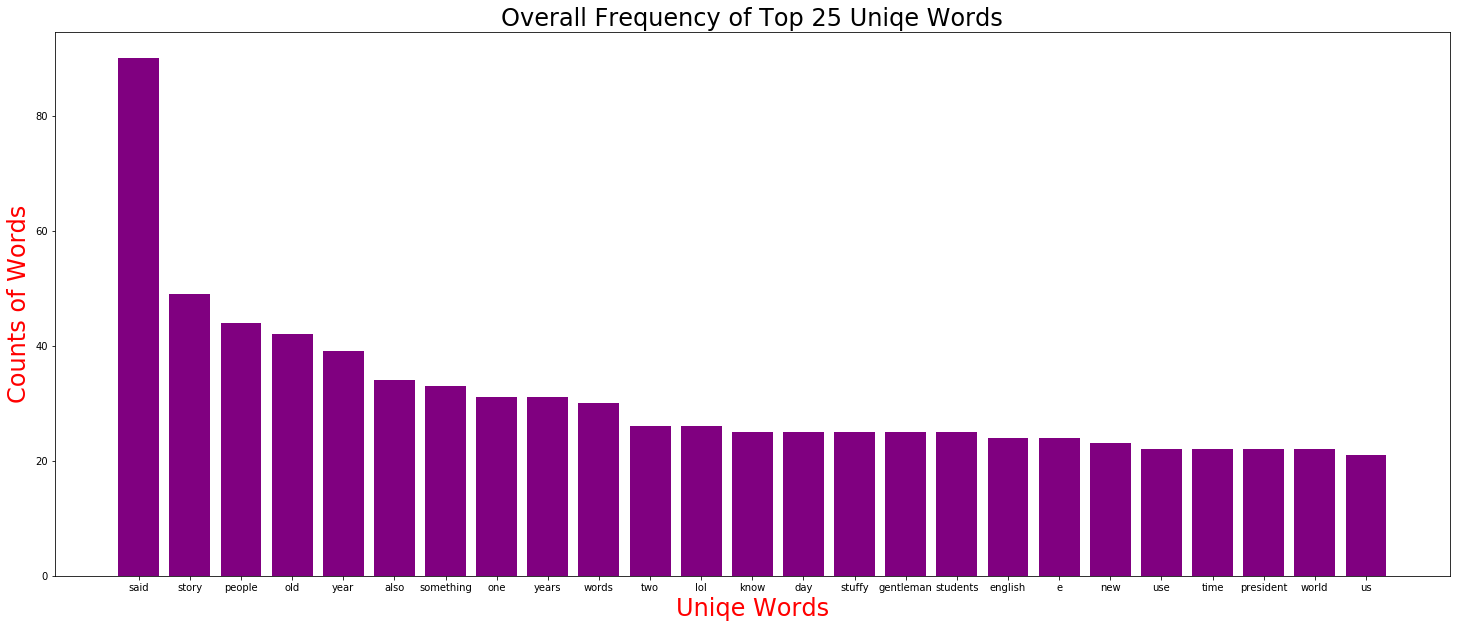

In [48]:
plt.bar(range(len(top_words)),values,tick_label=names, color='purple')
plt.savefig('bar.png')
plt.title("Overall Frequency of Top 25 Uniqe Words", fontsize=24)
plt.xlabel("Uniqe Words", fontsize=24, color='red')
plt.ylabel("Counts of Words", fontsize=24, color='red')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [49]:
wayone.to_csv('cleaned_data_voa.csv')